In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# graph style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("comments.csv")   # file name same hona chahiye

# first 5 rows
df.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [3]:
df.shape

(7488, 8)

In [4]:
df.columns

Index(['id', 'comment', 'User  id', 'Photo id', 'created Timestamp',
       'posted date', 'emoji used', 'Hashtags used count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7488 non-null   int64 
 1   comment              7488 non-null   object
 2   User  id             7488 non-null   int64 
 3   Photo id             7488 non-null   int64 
 4   created Timestamp    7488 non-null   object
 5   posted date          7488 non-null   object
 6   emoji used           7488 non-null   object
 7   Hashtags used count  7488 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 468.1+ KB


In [8]:
df['created Timestamp'] = pd.to_datetime(df['created Timestamp'], errors='coerce')

df['Day'] = df['created Timestamp'].dt.day_name()
df['Hour'] = df['created Timestamp'].dt.hour

/tmp/ipython-input-215669651.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['created Timestamp'] = pd.to_datetime(df['created Timestamp'], errors='coerce')


In [9]:
# har row already ek comment hai
df['Engagement'] = 1

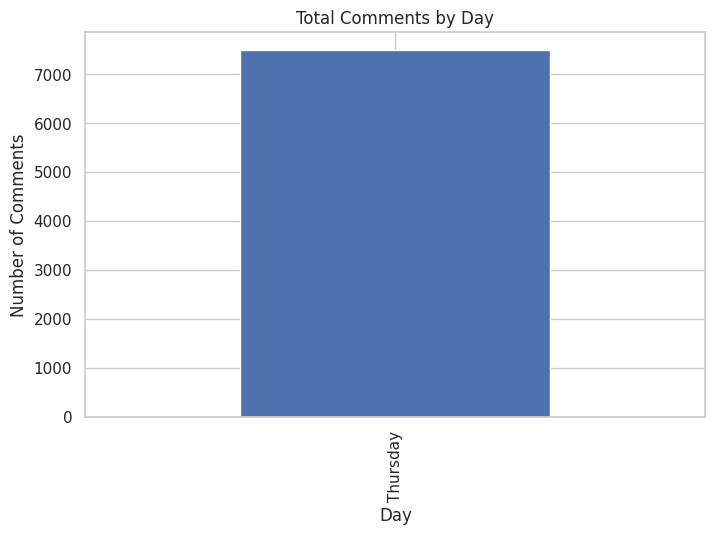

In [10]:
day_engagement = df.groupby('Day')['Engagement'].sum().sort_values()

plt.figure(figsize=(8,5))
day_engagement.plot(kind='bar')
plt.title("Total Comments by Day")
plt.ylabel("Number of Comments")
plt.show()

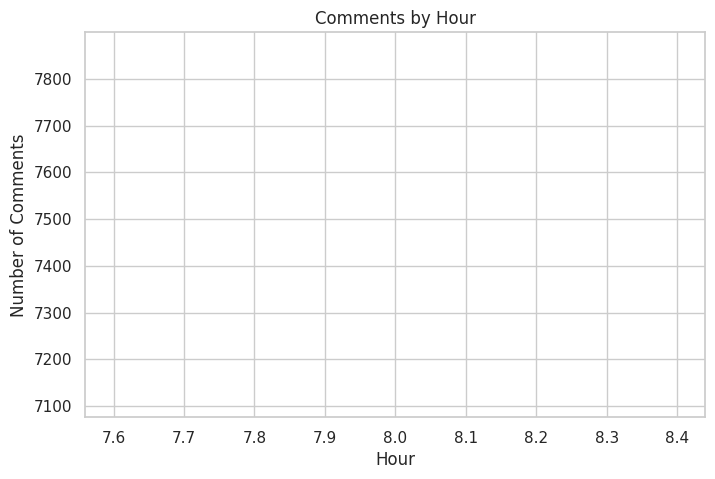

In [11]:
hour_engagement = df.groupby('Hour')['Engagement'].sum()

plt.figure(figsize=(8,5))
hour_engagement.plot(kind='line')
plt.title("Comments by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Comments")
plt.show()

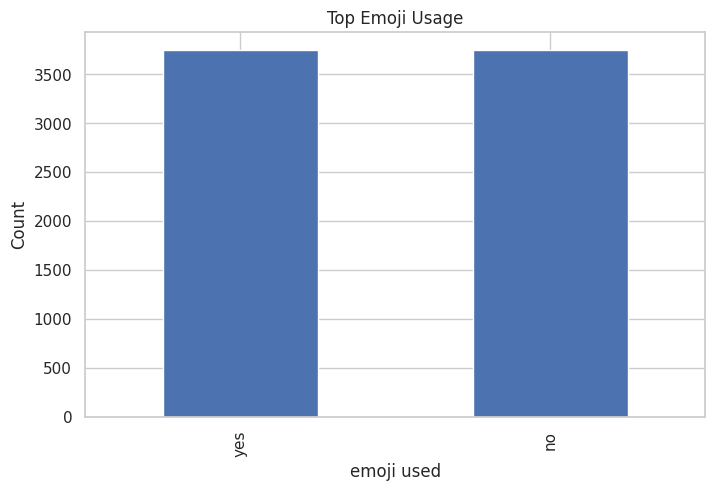

In [12]:
emoji_usage = df['emoji used'].value_counts().head(10)

plt.figure(figsize=(8,5))
emoji_usage.plot(kind='bar')
plt.title("Top Emoji Usage")
plt.ylabel("Count")
plt.show()

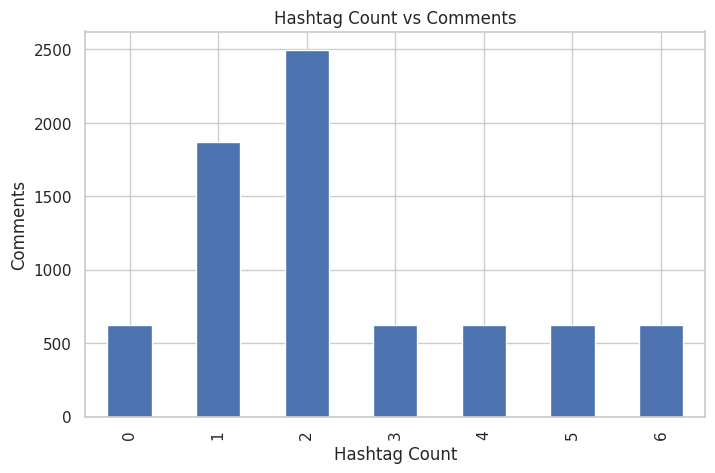

In [13]:
hashtag_engagement = df.groupby('Hashtags used count')['Engagement'].sum()

plt.figure(figsize=(8,5))
hashtag_engagement.plot(kind='bar')
plt.title("Hashtag Count vs Comments")
plt.xlabel("Hashtag Count")
plt.ylabel("Comments")
plt.show()

In [14]:
print("Best Day for Engagement:", day_engagement.idxmax())
print("Best Hour for Engagement:", hour_engagement.idxmax())
print("Most Used Emoji:", emoji_usage.idxmax())

Best Day for Engagement: Thursday
Best Hour for Engagement: 8
Most Used Emoji: yes
